............................Mid-Boot-Camp-Project..............................

Questions to be answered:

    1 : Does Netflix has more focus on TV Shows than movies (Ratio of movies to TV Serials). 
    
    2 : Understanding what content is available in different countries.
    
    3 : Network analysis of Actors / Directors and find others insights.
    
    5 : TV-Shows with maximum seasons.
    
    

In [90]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

#exploring and cleaning the data.


In [91]:
df = pd.read_csv(r"..\data\netflix_titles.csv")
#df = pd.read_csv(r"C:\Users\akki2\OneDrive\Documents\Ironhack\Week_5\Mid_bootcamp_project\data\netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [71]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [72]:
df.shape

(8807, 12)

In [73]:
print(df.columns.tolist())

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [74]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#as we can see that there are NaN values in director, cast, country, date added, grade and duration.
#The main variables to consider here would be the director,cast if there is at all there is an analysis to be done to count.. 
#The other main variable here is the country because that can give many other analysis. 
#The other variables we can get rid of the null variables in them. 

#One more thing to consider is that listed_in is basically genre of the content and it needs to be split to show one genre per content.
But when the genre has split using the lambda function it can create unwanted NaN values in country column but that can be managed. This can affect the overall efficieny of the model. 

In [75]:
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(",")[0])
df['listed_in'].head(10)

0               Documentaries
1      International TV Shows
2              Crime TV Shows
3                  Docuseries
4      International TV Shows
5                   TV Dramas
6    Children & Family Movies
7                      Dramas
8            British TV Shows
9                    Comedies
Name: listed_in, dtype: object

In [76]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [77]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [78]:
#df['director'] = df['director'].fillna('NoData')

In [79]:
#df['cast'] = df['cast'].fillna('NoData')

In [80]:
df = df.dropna(subset=['cast', 'director'])

In [81]:
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

In [82]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [83]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [84]:
df = df.dropna( how='any',subset=['duration'])

In [85]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [86]:
df.duplicated().sum()

0

#adding few columns for better understanding the column 'rating'

In [87]:
df['date_added']= pd.to_datetime(df['date_added'])

In [88]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [89]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,TV Dramas,The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,British TV Shows,A talented batch of amateur bakers face off in...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,Dramas,Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,Cult Movies,"A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,Comedies,Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero..."


In [49]:
#df['year'] = pd.DatetimeIndex(df['date_added']).year
#df['month'] = pd.DatetimeIndex(df['date_added']).month
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month

In [50]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021,9
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,TV Dramas,The arrival of a charismatic young priest brin...,2021,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s...",2021,9
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,British TV Shows,A talented batch of amateur bakers face off in...,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,Dramas,Recovering alcoholic Talal wakes up inside a s...,2016,3
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,Cult Movies,"A political cartoonist, a crime reporter and a...",2019,11
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,Comedies,Looking to survive in a world taken over by zo...,2019,11
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero...",2020,1


#ratio of movies vs TV_Shows

Text(0.5, 1.0, 'Ratio of Movie/TV Show')

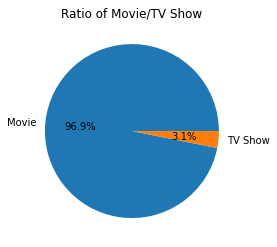

In [51]:
plt.pie(df['type'].value_counts(), labels = df['type'].value_counts().index, autopct="%.1f%%")
plt.title('Ratio of Movie/TV Show')

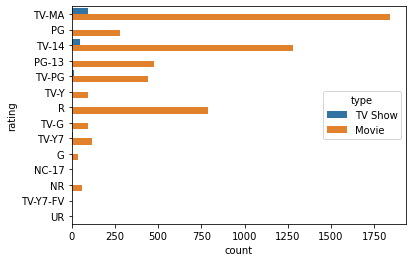

In [52]:
sns.countplot(data=df , y='rating' , hue = 'type')
plt.show()

<Figure size 1440x1080 with 0 Axes>

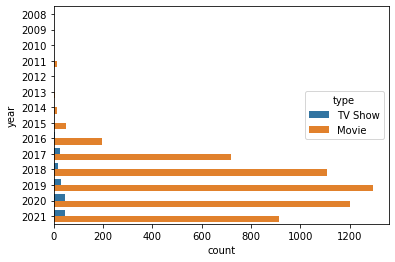

<Figure size 1440x1080 with 0 Axes>

In [53]:
sns.countplot(data=df , y='year' , hue = 'type')
plt.figure(figsize=(20,15))

<Figure size 1440x1080 with 0 Axes>

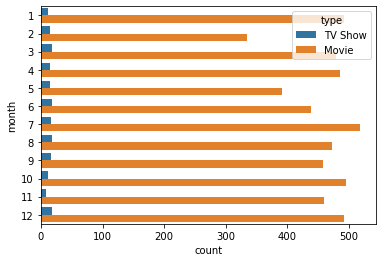

<Figure size 1440x1080 with 0 Axes>

In [54]:
sns.countplot(data=df , y='month' , hue = 'type')
plt.figure(figsize=(20,15))

We can see that year 2019 was the year with the highest amount of movies but 2020 was the year with the highest number of TV-Serials.
Also, we can see each month number of movies is higher than TV-Serials

#Understanding which countries have the highest movies content

<AxesSubplot:xlabel='country', ylabel='count'>

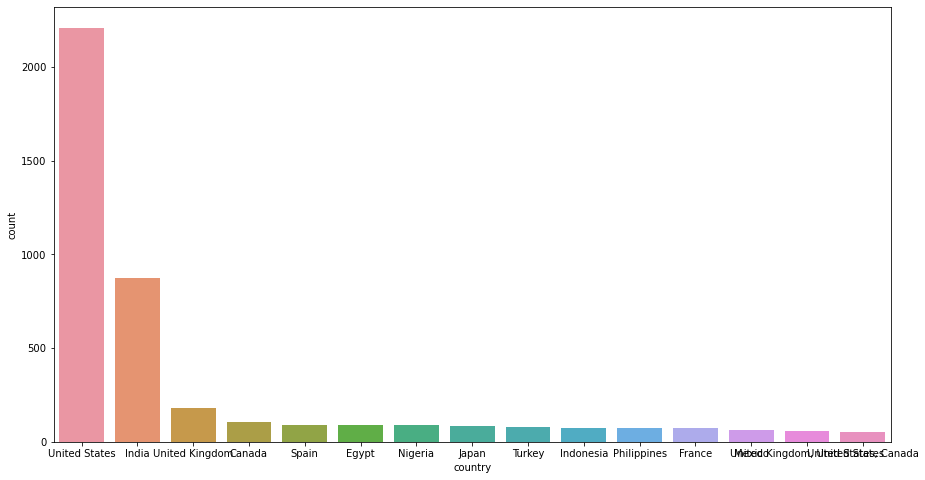

In [55]:
plt.figure(figsize=(15,8))
sns.countplot(x="country", data=df, order=df['country'].value_counts().index[0:15])

#Understanding which countries have the highest TV-Serials content

<AxesSubplot:xlabel='country', ylabel='count'>

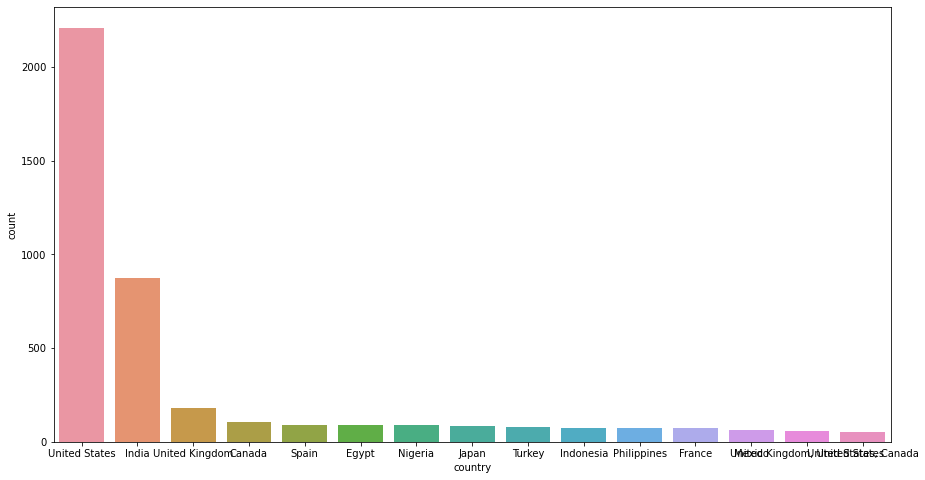

In [56]:
plt.figure(figsize=(15,8))
sns.countplot(x="country", data=df, order=df['country'].value_counts().index[0:15])


#Understanding what content is available in different countries.


In [57]:
cols = ['listed_in','country']
gen_country = df[cols]
gen_country.head(10)

,listed_in,country
2,Crime TV Shows,United States
5,TV Dramas,United States
6,Children & Family Movies,United States
7,Dramas,"United States, Ghana, Burkina Faso, United Kin..."
8,British TV Shows,United Kingdom
9,Comedies,United States
11,Crime TV Shows,United States
12,Dramas,"Germany, Czech Republic"
13,Children & Family Movies,United States
18,Thrillers,United States


#understanding the yearly analysis of the content of Netflix 

<AxesSubplot:xlabel='count', ylabel='release_year'>

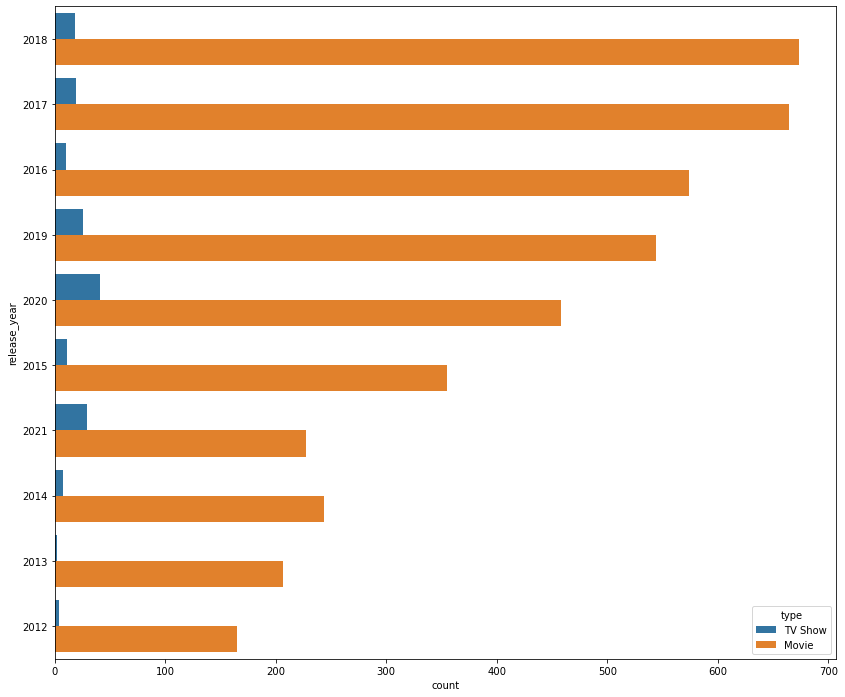

In [58]:
plt.figure(figsize=(14,12))
sns.countplot(y="release_year",data = df, order= df['release_year'].value_counts().index[0:10],hue =df['type'])

#understanding most popular genre on Netflix

<AxesSubplot:xlabel='listed_in', ylabel='count'>

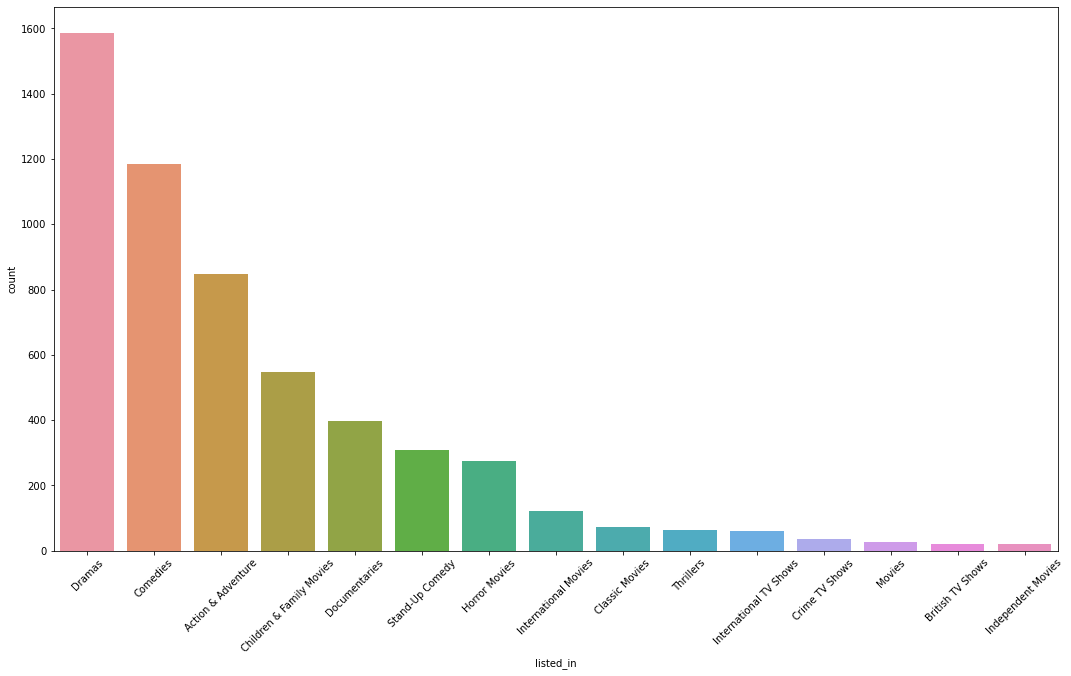

In [67]:
plt.figure(figsize=(18,10))
plt.xticks(rotation =45)
sns.countplot(x="listed_in", data=df, order=df['listed_in'].value_counts().index[0:15])

The best 'listed_in'(genre) column is 'Dramas' 

#Directors with most amount of Content

In [60]:
movie_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

In [61]:
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s...",2021,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,Comedies,A woman adjusting to life after a loss contend...,2021,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,Dramas,After most of her family is murdered in a terr...,2021,9
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",United States,2021-09-22,2021,TV-PG,91 min,Children & Family Movies,When the clever but socially-awkward Tetê join...,2021,9


In [62]:
tv_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021,9
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,TV Dramas,The arrival of a charismatic young priest brin...,2021,9
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,British TV Shows,A talented batch of amateur bakers face off in...,2021,9
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",United States,2021-09-23,2021,TV-MA,1 Season,Crime TV Shows,"Struggling to earn a living in Bangkok, a man ...",2021,9
47,s48,TV Show,The Smart Money Woman,Bunmi Ajakaiye,"Osas Ighodaro, Ini Dima-Okojie, Kemi Lala Akin...",United States,2021-09-16,2020,TV-MA,1 Season,International TV Shows,Five glamorous millennials strive for success ...,2021,9


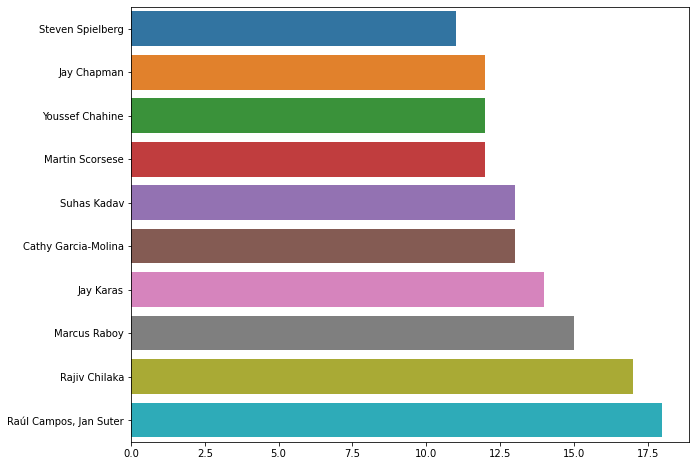

In [63]:
plt.figure(figsize=(10,8))
sns.barplot(y= movie_df.director.value_counts()[:10].sort_values().index, x=movie_df.director.value_counts()[:10].sort_values().values);

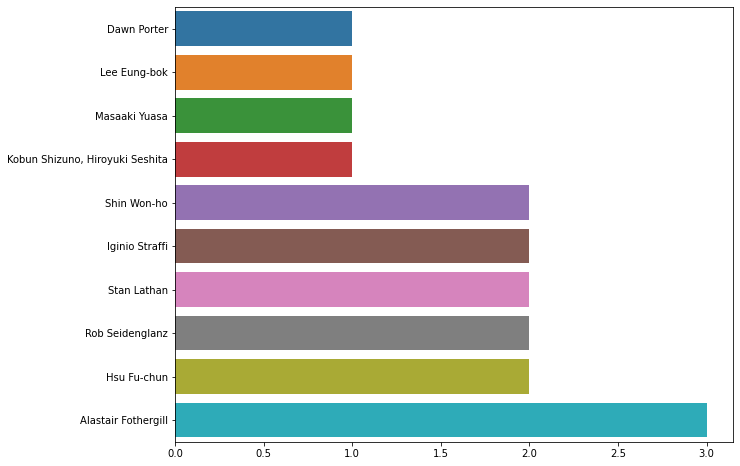

In [64]:
plt.figure(figsize=(10,8))
sns.barplot(y= tv_df.director.value_counts()[:10].sort_values().index, x=tv_df.director.value_counts()[:10].sort_values().values);

#Cast/Actors with most amount of movies 

<Figure size 432x288 with 0 Axes>

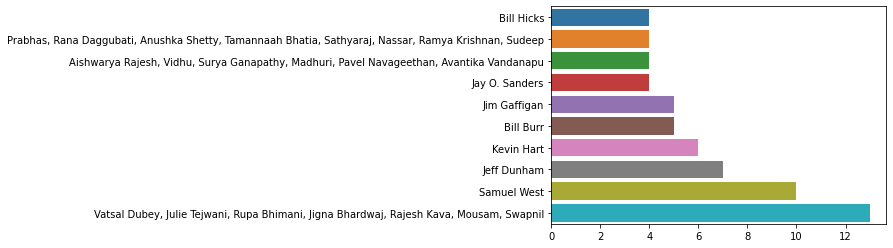

<Figure size 432x288 with 0 Axes>

In [65]:
sns.barplot(y= df.cast.value_counts()[:10].sort_values().index, x=df.cast.value_counts()[:10].sort_values().values)
plt.figure()

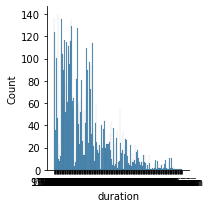

In [66]:
sns.displot(x=df['duration'],height = 3)